### <span style="color:pink; font-weight:bold"> CURSO - Data Science: dados e visualizações</span>

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
# importando os dados utilizando a biblioteca pandas
import pandas as pd

notas = pd.read_csv("/home/ba/Documentos/data-science/ratings.csv")
notas.head()



,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
# uma das maneiras de saber quantas avaliações existem é pedir o formato da tabela com notas.shape
notas.shape

(100836, 4)

Alterando os nomes das colunas para português:

In [7]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

Consultando todos os dados da coluna notas:

In [8]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

Agora, vemos os dados em uma única coluna, sendo uma série de números que chamamos de Pandas Series

Utilizando "unique()" vemos quais são os valores colocados nesta coluna de maneira única

In [9]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Através do pandas é possível fazer a leitura e escrita de um conjunto de dados de diversas maneiras, além disso, extrair informações a partir desses dados.

In [10]:
# quantas vezes uma nota específica aparece nesta coluna, ordenadas de forma decrescente

notas['nota'].value_counts()

nota
4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: count, dtype: int64

In [11]:
# encontrando a média dessas notas:

notas['nota'].mean()

3.501556983616962

#### <span style="color:pink; font-weight:bold"> Explorando os dados de maneira visual com histograma e boxplot</span>

O pandas possui um método plot() justamente para plotar dados.

In [12]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


<Axes: >

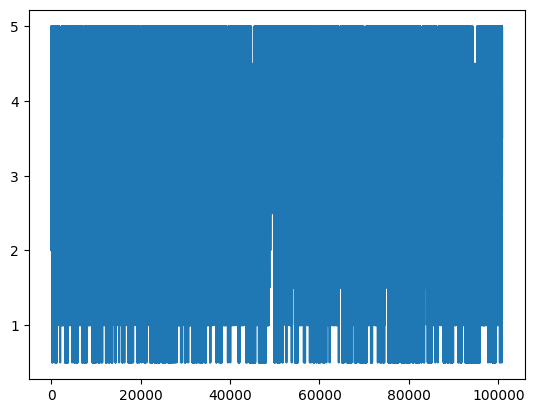

In [13]:
notas.nota.plot()

O gráfico plot() de uma série cruza índices da tabela com valores da coluna que apontamos, criando pontos para cada resultado.  
Todos os pontos sçao ligados por reta, por isso, o gráfico fica inelegível.

Queremos saber quantas vezes cada informação aparece nesse conjunto de dados. Visualizamos isso em um histograma usando o argumento kind com o valor hist

<Axes: ylabel='Frequency'>

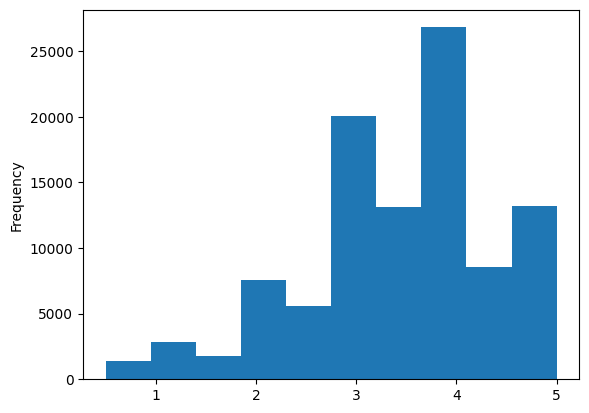

In [14]:
notas.nota.plot(kind='hist')

Para saber exatamente qual valor divide nossos dados na metade , calculamos a mediana.  
É possível imprimir tanto a média quanto a mediana na tela da seguinte forma:

In [15]:
print("Média",notas['nota'].mean())
print("Mediana",notas['nota'].median())

Média 3.501556983616962
Mediana 3.5


Utilizando o describe() é possível obter outros valores além da média e da mediana

In [16]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

Dessa forma, sabemos que temos 100.836 dados; a média das notas é 3.501557; o valor mínimo é 0,5; o máximo é 5; a mediana é 3.5; 25% dos dados (um quartil) estão abaixo de 3; e outros 25% estão acima de 4.

In [17]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Outra visualização que nos permite analisar esses dados é o boxplot, que descreve em uma espécie de "caixa" a posição dos valores plotados. 

<Axes: xlabel='nota'>

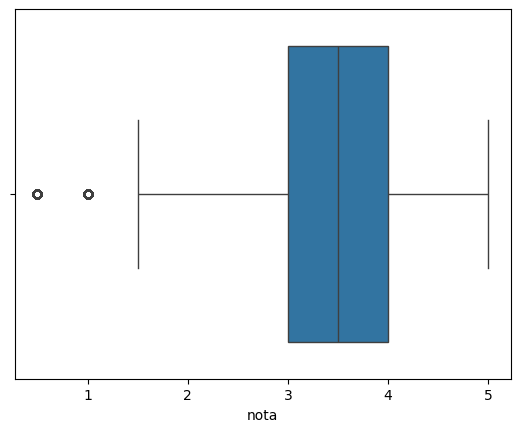

In [18]:
import seaborn as sns

sns.boxplot(x=notas.nota)

A mediana está representada no meio do retângulo azul — ou seja, no 3,5, dividindo, em duas partes, 50% dos dados (entre 3 e 3,5, e entre 3,5 e 4. Outros 25% dos nossos dados estão entre 4 e 5, e o restante está abaixo de 3.

Através dessas análises, extraímos algumas informações, como que metade dos usuários (uma parcela muito grande!) deu avaliações entre 3 e 4, e que as notas entre 0,5 e 1,5 figuram pouco significativamente nessa amostra.

#### <span style="color:pink; font-weight:bold"> Análise exploratória de dados</span>

In [19]:
filmes = pd.read_csv('/home/ba/Documentos/data-science/movies.csv')

filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [20]:
filmes.columns = ["filmeId", "titulo", "generos"]

In [21]:
filmes

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [22]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#### <span style="color:pink; font-weight:bold"> Analisando algumas notas específicas</span>

Através de uma query é possível cruzar informações entre os data frames notas e filmes.  
É possível fazer isso criando uma query, comparando o valor 1, que corresponde ao filme "toy story" com a coluna filmeId do data frame notas

In [25]:
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
        ... 
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

In [27]:
notas.query("filmeId==1").nota.mean()  # média do filme do toy story

3.9209302325581397

In [31]:
notas.query("filmeId==2").nota.mean() # média do filme jumanji

3.4318181818181817

Agora vamos pegar todo o dataframe a agrupar pela coluna filmeId

In [33]:
notas.groupby("filmeId").mean()  #agrupado por filme e feito a média

,usuarioId,nota,momento
filmeId,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


Como não faz sentido tirar a média do usuario Id e o momento, vamos extrair apenas a coluna nota:

In [37]:
medias_por_filme = notas.groupby("filmeId").mean()["nota"]  # quando extraímos uma coluna ele devolve uma série
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

Agora vamos plotar essas notas em um gráfico para visualizar melhor:

<Axes: ylabel='Frequency'>

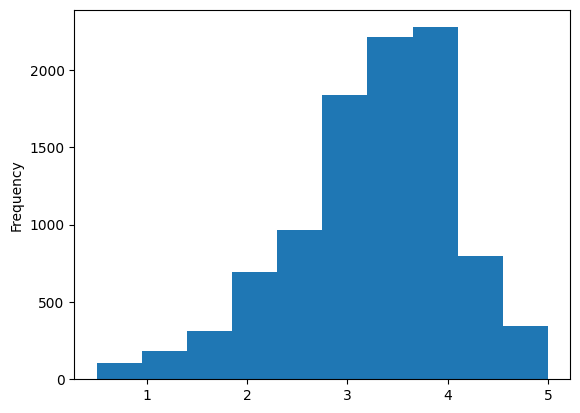

In [40]:
medias_por_filme.plot(kind='hist') #como se distribuem as médias dos filmes

Além do pandas podemos utilizar outras bibliotecas gráficas

<Axes: xlabel='nota'>

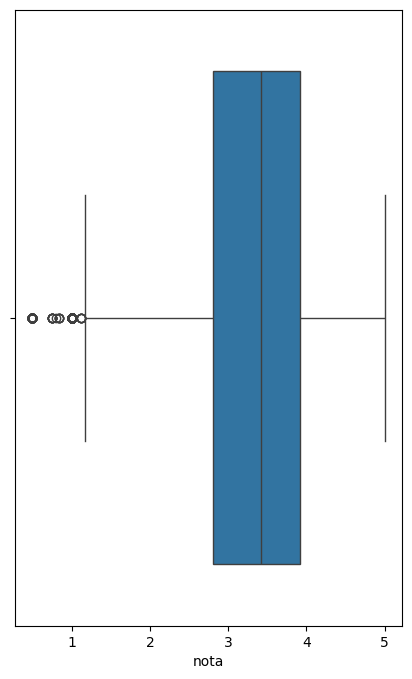

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(x=medias_por_filme)

Lembrando que pra analisar melhor os valores do boxplot usamos o describe

In [43]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

O pandas também é capaz de fazer box plot, assim como o seaborn também é capas de fazer gráficos de histograma

/tmp/ipykernel_5704/4045850242.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10) #bins escolhe quantas caixinhas vou separar meus dados, porém é necessário ter cuidado


<Axes: xlabel='nota', ylabel='Density'>

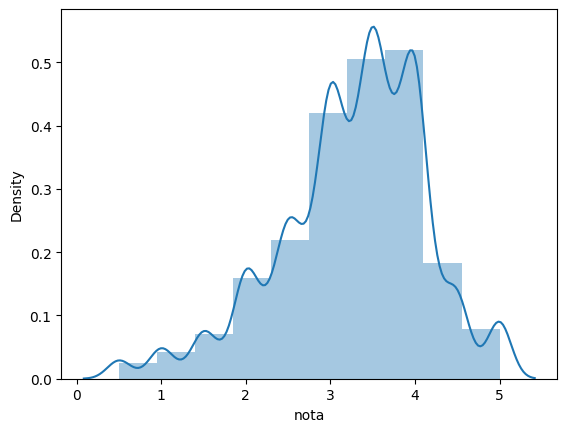

In [47]:
sns.distplot(medias_por_filme, bins=10) #bins escolhe quantas caixinhas vou separar meus dados, porém é necessário ter cuidado

A biblioteca que o panda e o seaborn usa para gerar esses gráficos é a matplotlib, é possível importá-la e utilizar a função plt.hist() para plotar nosso histograma na tela:

Text(0.5, 1.0, 'Histograma da média dos filmes')

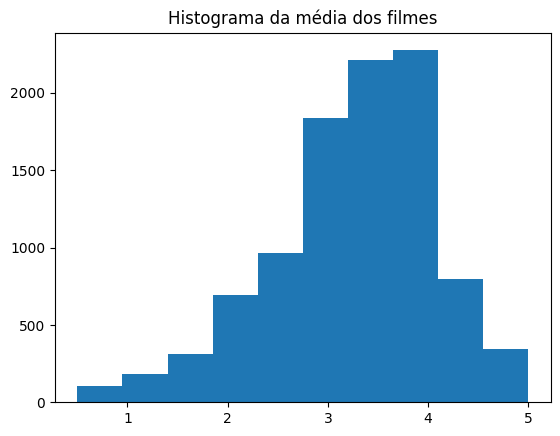

In [51]:
import matplotlib.pyplot as plt

plt.hist(medias_por_filme)
plt.title("Histograma da média dos filmes")